In [1]:
#숙제는?
# f(x)=A*sin(kx)에 따라서 생성하고(오차포함) 피팅헤서 파라미터 A.K다시 찾기
#위의 f(x) 에 대해서 A,k 찾기 여러번 수행, 이 때 x(카이)**2값의 히스토그램 구하기
#그리고 전부 numpy 로 바꾸기

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
#sanple make


In [5]:
def f(x,A,k):
    return A*math.sin(k*x)

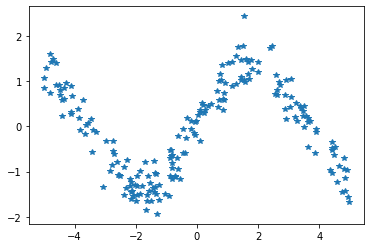

In [166]:
A=1.35
K=0.87
x=[]
y=[]
mu_=0
sigma_=0.3
#trial_range=200
for i in range(200):
    x0=random.uniform(-5,5)
    y0=f(x0,A,K)+random.gauss(mu_,sigma_)
    x.append(x0)
    y.append(y0)
plt.plot(x,y,'*')
plt.show()


0.3059757397298086 1.355065112192377 0.8643036898669793
208.0470073404524


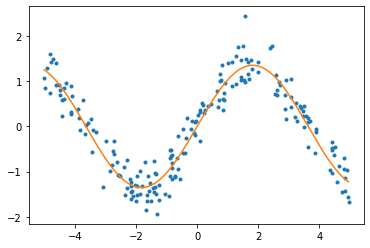

In [175]:
## 수정 필

bestLoss  =1e7
bestA, bestk = 0,0
dt = 0.001
lossHistory=[]
aHistory = []
kHistory = []
aHistory_ = []
kHistory_ = []
a,k =1,0.5

for i in range(5000):
  aGrad = [ +2*math.sin(k*x[i])*(y[i]-f(x[i],a,k)) for i in range(len(y))]
  kGrad = [ +2*a*x[i]*math.cos(k*x[i])*(y[i]-f(x[i],a,k)) for i in range(len(y))]
  a += (sum(aGrad)/len(aGrad))*dt
  k += (sum(kGrad)/len(kGrad))*dt
  #a += sum(aGrad)*dt
  #k += sum(kGrad)*dt
  #print(a,b)
  aHistory_.append(a)
  kHistory_.append(k)
  reses = [ (y[i]-f(x[i],a,k))**2 for i in range(len(y))]
  loss = math.sqrt(sum(reses)/len(reses))
  lossHistory.append(loss)
  if loss<bestLoss:
    bestA, bestk = a,k
    bestLoss = loss
    aHistory.append(a)
    kHistory.append(k)
    #print(loss)
    #print(i)
print(bestLoss,bestA,bestk)
x0,x1=min(x),max(x)
plt.plot(x,y,'.')
X_2 = sum([(y[i]-f(x[i],a,k))**2/sigma_**2 for i in range(len(y))])
print(X_2)
#print("카이 제곱:  {}".format=X_2)
x_list=np.array([-5+i*10/len(x) for i in range(len(x))])
y_list=np.array([f(x_list[i],bestA,bestk) for i in range(len(x))])
plt.plot(x_list,y_list)
plt.show()


In [159]:
#print(aHistory)
#plt.plot(aHistory)

In [160]:
#plt.plot(kHistory)

In [161]:
#plt.plot(lossHistory)

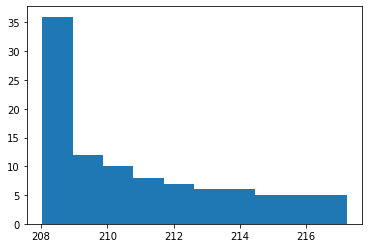

In [178]:
a,k =0.2,0.5
X_2=[]
for j in range(100):
  a,k =1+0.1*j,0.5
  bestLoss  =1e7
  bestA, bestk = 0,0
  dt = 0.001
  lossHistory=[]

  for i in range(5000):
    aGrad = [ +2*math.sin(k*x[i])*(y[i]-f(x[i],a,k)) for i in range(len(y))]
    kGrad = [ +2*a*x[i]*math.cos(k*x[i])*(y[i]-f(x[i],a,k)) for i in range(len(y))]
    a += (sum(aGrad)/len(aGrad))*dt
    k += (sum(kGrad)/len(kGrad))*dt
    reses = [ (y[i]-f(x[i],a,k))**2 for i in range(len(y))]
    loss = math.sqrt(sum(reses)/len(reses))
    lossHistory.append(loss)
    if loss<bestLoss:
      bestA, bestk = a,k
      bestLoss = loss
  #print(bestLoss,bestA,bestk)
  X_2_ = sum([(y[i]-f(x[i],a,k))**2/sigma_**2 for i in range(len(y))])
  #print(X_2_)
  #print(type(X_2_))
  X_2.append(X_2_)
plt.hist(X_2)
plt.show()